# Healty lifestyle case Study 
<img src="https://d2gg9evh47fn9z.cloudfront.net/800px_COLOURBOX4534847.jpg" width="100%" height="500">

# Context
1. Healthy lifestyle metrics of top 44 cities.
2. Sunshine hours(City)
3. Cost of a bottle of water(City)
4. Obesity levels(Country)
5. Life expectancy(years) (Country)
6. Pollution(Index score) (City)
7. Annual avg. hours worked
8. Happiness levels(Country)
9. Outdoor activities(City)
10.Number of take out places(City)
11. Cost of a monthly gym membership(City)

In [59]:
#-------------------------------------------------------------------------------------------------------------------------------
# import numpy
import numpy as np                                                  # Impport numerical python for Data analyis
np.set_printoptions(precision = 4)                                  # To display value  only upto 4 decimal place
#-------------------------------------------------------------------------------------------------------------------------------

import pandas as pd                                                # Import Pandas for loading, profiling and wrangling of Data.
from pandas_profiling import ProfileReport                          # Import pandas profiling 
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high      
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity      
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------

from matplotlib import pyplot as plt ; plt.rcdefaults()              # Import Matplot for DataVisualisation.
plt.style.use('seaborn-whitegrid')                                  # to apply seaborn whitegrid, classic style to the plots
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------

import seaborn as sns                                                # Import seaborn for visualisation.
sns.set(style='whitegrid',font_scale=1.3, color_codes= True)         # To adjust seaborn setting for plot

#------------------------------------------------------------------------------------------------------------------------------
import plotly.express as px
#------------------------------------------------------------------------------------------------------------------------------
import datetime                                                       # import datetime module to handle date and time
#------------------------------------------------------------------------------------------------------------------------------
import networkx as nx
#------------------------------------------------------------------------------------------------------------------------------
import warnings                                            # To Supress all the warning in notebook
warnings.filterwarnings('ignore')


In [60]:
# Loading of datasets using github link
health_data = pd.read_csv('https://raw.githubusercontent.com/sushil1902/Datasets/main/healthy_lifestyle_city_2021.csv')
health_data.head()

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81,30.93,1434,7,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82,26.86,1712,7,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81,17.33,1501,7,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,82,19.63,1452,7,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,80,21.24,1380,8,154,523,£32.53


In [61]:
health_data.shape

(44, 12)

In [62]:
health_data.columns

Index(['City', 'Rank', 'Sunshine hours(City)',
       'Cost of a bottle of water(City)', 'Obesity levels(Country)',
       'Life expectancy(years) (Country)', 'Pollution(Index score) (City)',
       'Annual avg. hours worked', 'Happiness levels(Country)',
       'Outdoor activities(City)', 'Number of take out places(City)',
       'Cost of a monthly gym membership(City)'],
      dtype='object')

In [63]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   City                                    44 non-null     object 
 1   Rank                                    44 non-null     int64  
 2   Sunshine hours(City)                    44 non-null     object 
 3   Cost of a bottle of water(City)         44 non-null     object 
 4   Obesity levels(Country)                 44 non-null     object 
 5   Life expectancy(years) (Country)        44 non-null     float64
 6   Pollution(Index score) (City)           44 non-null     object 
 7   Annual avg. hours worked                44 non-null     object 
 8   Happiness levels(Country)               44 non-null     float64
 9   Outdoor activities(City)                44 non-null     int64  
 10  Number of take out places(City)         44 non-null     int64  


In [64]:
health_data.dtypes

City                                       object
Rank                                        int64
Sunshine hours(City)                       object
Cost of a bottle of water(City)            object
Obesity levels(Country)                    object
Life expectancy(years) (Country)          float64
Pollution(Index score) (City)              object
Annual avg. hours worked                   object
Happiness levels(Country)                 float64
Outdoor activities(City)                    int64
Number of take out places(City)             int64
Cost of a monthly gym membership(City)     object
dtype: object

In [65]:
health_data.sample(2)

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
30,Hong Kong,31,1836,£0.75,6.20%,75,67.46,-,6,277,1257,£57.95
34,Paris,35,1662,£1.95,21.60%,82,65.10,1505,7,331,4363,£35.93


In [66]:
health_data.isnull().sum()

City                                      0
Rank                                      0
Sunshine hours(City)                      0
Cost of a bottle of water(City)           0
Obesity levels(Country)                   0
Life expectancy(years) (Country)          0
Pollution(Index score) (City)             0
Annual avg. hours worked                  0
Happiness levels(Country)                 0
Outdoor activities(City)                  0
Number of take out places(City)           0
Cost of a monthly gym membership(City)    0
dtype: int64

In [67]:
health_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rank,44,22,13,1,12,22,33,44
Life expectancy(years) (Country),44,78,5,56,75,80,82,83
Happiness levels(Country),44,6,1,4,6,7,7,8
Outdoor activities(City),44,214,127,23,125,190,288,585
Number of take out places(City),44,1443,1389,250,548,998,1674,6417


In [68]:
health_data1 = health_data.groupby(['City']).mean()
health_data1.sort_values(by ='Rank',ascending = True)

,Rank,Life expectancy(years) (Country),Happiness levels(Country),Outdoor activities(City),Number of take out places(City)
City,,,,,
Amsterdam,1,81,7,422,1048
Sydney,2,82,7,406,1103
Vienna,3,81,7,132,1008
Stockholm,4,82,7,129,598
Copenhagen,5,80,8,154,523
Helsinki,6,80,8,113,309
Fukuoka,7,83,6,35,539
Berlin,8,81,7,254,1729
Barcelona,9,82,6,585,2344


In [69]:
health_data.head(2)

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81,30.93,1434,7,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82,26.86,1712,7,406,1103,£41.66


# Regularisation of Column Header

In [70]:
health_data.columns

Index(['City', 'Rank', 'Sunshine hours(City)',
       'Cost of a bottle of water(City)', 'Obesity levels(Country)',
       'Life expectancy(years) (Country)', 'Pollution(Index score) (City)',
       'Annual avg. hours worked', 'Happiness levels(Country)',
       'Outdoor activities(City)', 'Number of take out places(City)',
       'Cost of a monthly gym membership(City)'],
      dtype='object')

In [71]:
#Replaceing columns header with _
health_data.columns = (col.replace(" ","_") for col in health_data.columns)

In [72]:
health_data.columns

Index(['City', 'Rank', 'Sunshine_hours(City)',
       'Cost_of_a_bottle_of_water(City)', 'Obesity_levels(Country)',
       'Life_expectancy(years)_(Country)', 'Pollution(Index_score)_(City)',
       'Annual_avg._hours_worked', 'Happiness_levels(Country)',
       'Outdoor_activities(City)', 'Number_of_take_out_places(City)',
       'Cost_of_a_monthly_gym_membership(City)'],
      dtype='object')

In [73]:
# Convert all columns header to lower case
health_data.columns = map(str.lower,health_data.columns)

In [74]:
health_data.columns

Index(['city', 'rank', 'sunshine_hours(city)',
       'cost_of_a_bottle_of_water(city)', 'obesity_levels(country)',
       'life_expectancy(years)_(country)', 'pollution(index_score)_(city)',
       'annual_avg._hours_worked', 'happiness_levels(country)',
       'outdoor_activities(city)', 'number_of_take_out_places(city)',
       'cost_of_a_monthly_gym_membership(city)'],
      dtype='object')

# Handling of Data Types of columns

In [75]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   city                                    44 non-null     object 
 1   rank                                    44 non-null     int64  
 2   sunshine_hours(city)                    44 non-null     object 
 3   cost_of_a_bottle_of_water(city)         44 non-null     object 
 4   obesity_levels(country)                 44 non-null     object 
 5   life_expectancy(years)_(country)        44 non-null     float64
 6   pollution(index_score)_(city)           44 non-null     object 
 7   annual_avg._hours_worked                44 non-null     object 
 8   happiness_levels(country)               44 non-null     float64
 9   outdoor_activities(city)                44 non-null     int64  
 10  number_of_take_out_places(city)         44 non-null     int64  


In [76]:
(health_data.select_dtypes(include =['object']).columns)
print('Total Count of Object : ', health_data.dtypes[health_data.dtypes.map(lambda health_data : health_data=='object')].value_counts())

Total Count of Object :  object    7
dtype: int64


In [77]:
x = health_data.dtypes[health_data.dtypes.map(lambda health_data: health_data=='int64')].value_counts();
y = int(health_data.dtypes[health_data.dtypes.map(lambda health_data: health_data=='float64')].value_counts());
print("Total count of int & float is : ",x+y)


Total count of int & float is :  int64    5
dtype: int64


In [78]:
health_data.head()

,city,rank,sunshine_hours(city),cost_of_a_bottle_of_water(city),obesity_levels(country),life_expectancy(years)_(country),pollution(index_score)_(city),annual_avg._hours_worked,happiness_levels(country),outdoor_activities(city),number_of_take_out_places(city),cost_of_a_monthly_gym_membership(city)
0,Amsterdam,1,1858,£1.92,20.40%,81,30.93,1434,7,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82,26.86,1712,7,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81,17.33,1501,7,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,82,19.63,1452,7,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,80,21.24,1380,8,154,523,£32.53


In [79]:
# Remove Pound sign from cost of water bottle and convert it type to float
health_data['cost_of_a_bottle_of_water(city)'] = health_data['cost_of_a_bottle_of_water(city)'].str[1:].astype(float)

In [80]:
health_data.head()

,city,rank,sunshine_hours(city),cost_of_a_bottle_of_water(city),obesity_levels(country),life_expectancy(years)_(country),pollution(index_score)_(city),annual_avg._hours_worked,happiness_levels(country),outdoor_activities(city),number_of_take_out_places(city),cost_of_a_monthly_gym_membership(city)
0,Amsterdam,1,1858,2,20.40%,81,30.93,1434,7,422,1048,£34.90
1,Sydney,2,2636,1,29.00%,82,26.86,1712,7,406,1103,£41.66
2,Vienna,3,1884,2,20.10%,81,17.33,1501,7,132,1008,£25.74
3,Stockholm,4,1821,2,20.60%,82,19.63,1452,7,129,598,£37.31
4,Copenhagen,5,1630,2,19.70%,80,21.24,1380,8,154,523,£32.53


In [81]:
health_data.shape

(44, 12)

# Prepare data for analysis

In [82]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   city                                    44 non-null     object 
 1   rank                                    44 non-null     int64  
 2   sunshine_hours(city)                    44 non-null     object 
 3   cost_of_a_bottle_of_water(city)         44 non-null     float64
 4   obesity_levels(country)                 44 non-null     object 
 5   life_expectancy(years)_(country)        44 non-null     float64
 6   pollution(index_score)_(city)           44 non-null     object 
 7   annual_avg._hours_worked                44 non-null     object 
 8   happiness_levels(country)               44 non-null     float64
 9   outdoor_activities(city)                44 non-null     int64  
 10  number_of_take_out_places(city)         44 non-null     int64  


In [83]:
health_data['city'] = health_data['city'].str.strip()

In [84]:
health_data['sunshine_hours(city)'] = pd.to_numeric(health_data['sunshine_hours(city)'],errors = 'coerce')

In [85]:
health_data['cost_of_a_bottle_of_water(city)'] = pd.to_numeric(health_data['cost_of_a_bottle_of_water(city)'],errors='coerce')

In [86]:
health_data['obesity_levels(country)'] = health_data['obesity_levels(country)'].str.rstrip('%').astype('float')

In [87]:
health_data['pollution(index_score)_(city)'] = pd.to_numeric(health_data['pollution(index_score)_(city)'] ,errors = 'coerce')

In [88]:
health_data['annual_avg._hours_worked'] = pd.to_numeric(health_data['annual_avg._hours_worked'],errors='coerce')

In [89]:
health_data['cost_of_a_monthly_gym_membership(city)'].dtypes

dtype('O')

In [90]:
health_data['cost_of_a_monthly_gym_membership(city)'] = health_data['cost_of_a_monthly_gym_membership(city)'].str[1:].astype('float')

# Check Correlation among data

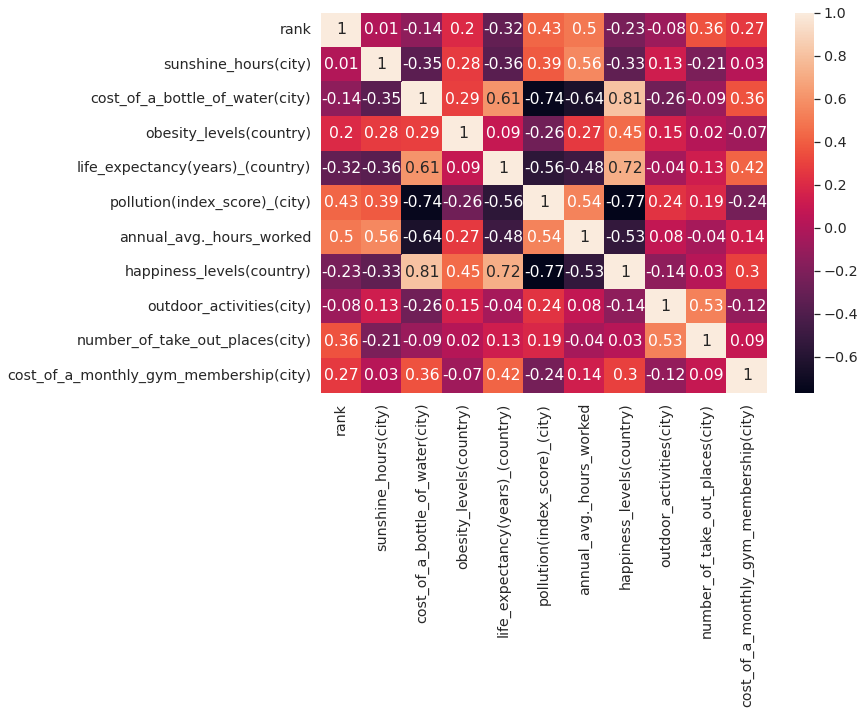

In [91]:
plt.figure(figsize=(10,7))
cor = health_data.corr()
sns.heatmap(round(cor,2),annot=True,xticklabels=cor.columns, yticklabels=cor.columns)
plt.show()

# City Vs Happiness level in top 10 Country

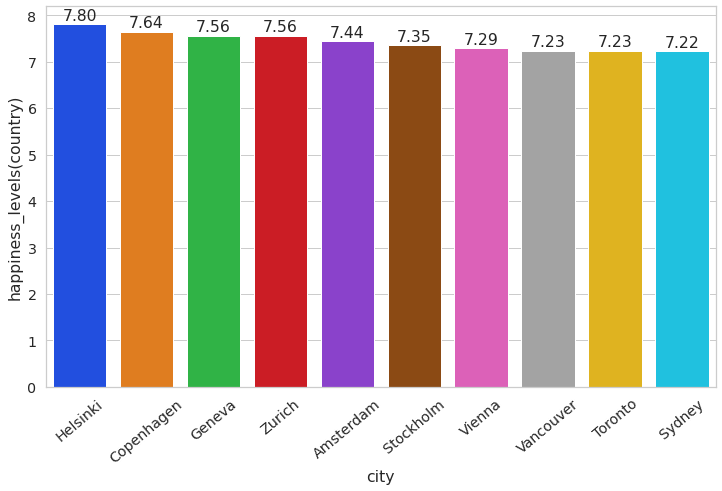

In [92]:
# What is relation between cities and happiness level
plt.figure(figsize=(12,7))
g = sns.barplot(x='city', y="happiness_levels(country)", data=health_data.nlargest(10, 'happiness_levels(country)'),
            palette='bright');
plt.xticks(rotation=40)
for p in g.patches:
  g.annotate(format(p.get_height(),".2f"),
             (p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va= 'center',xytext=(0,9),textcoords='offset points')

# Life expecatncy of top 10 country

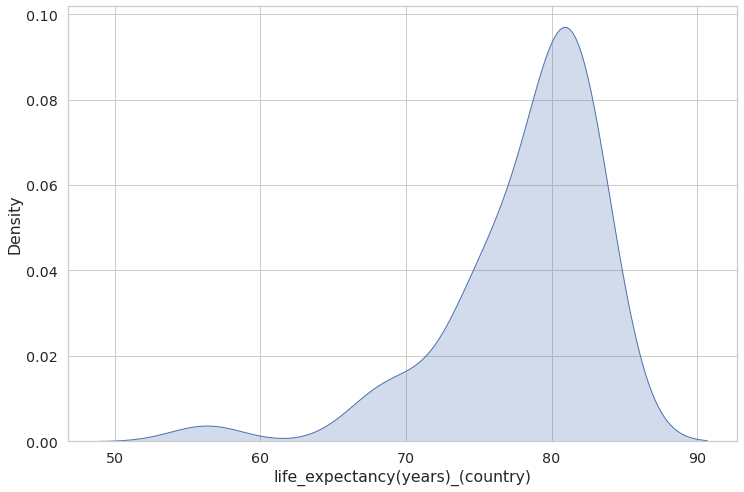

In [93]:
plt.figure(figsize=(12,8))
sns.kdeplot(health_data['life_expectancy(years)_(country)'],shade= True);

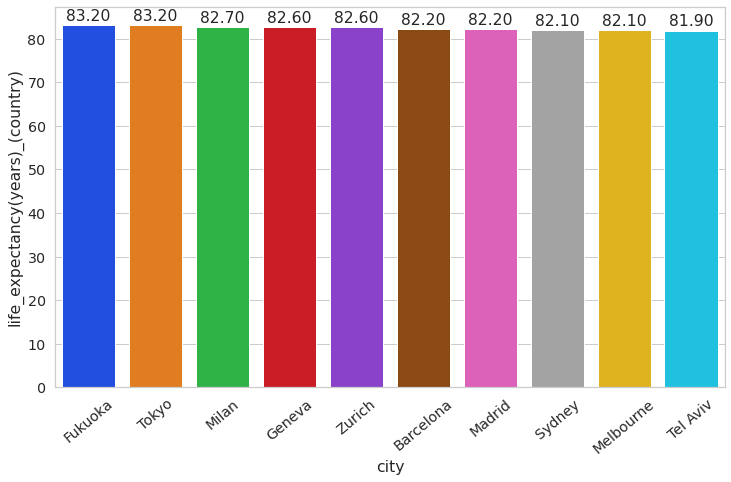

In [94]:
plt.figure(figsize=(12,7))
g=sns.barplot(x='city',
            y ='life_expectancy(years)_(country)',
            data=health_data.nlargest(10,'life_expectancy(years)_(country)'),palette='bright')
plt.xticks(rotation=40)
for p in g.patches:
  g.annotate(format(p.get_height(),".2f"),
             (p.get_x()+p.get_width()/2.,p.get_height()),ha='center',va= 'center',xytext=(0,9),textcoords='offset points')

# Check Groupby city and it's rank

In [95]:
#DataFrame.sort_values(by, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)
data = health_data.groupby('city').mean()
data.sort_values(by='rank',ascending=True)

,rank,sunshine_hours(city),cost_of_a_bottle_of_water(city),obesity_levels(country),life_expectancy(years)_(country),pollution(index_score)_(city),annual_avg._hours_worked,happiness_levels(country),outdoor_activities(city),number_of_take_out_places(city),cost_of_a_monthly_gym_membership(city)
city,,,,,,,,,,,
Amsterdam,1,1858,2,20,81,31,1434,7,422,1048,35
Sydney,2,2636,1,29,82,27,1712,7,406,1103,42
Vienna,3,1884,2,20,81,17,1501,7,132,1008,26
Stockholm,4,1821,2,21,82,20,1452,7,129,598,37
Copenhagen,5,1630,2,20,80,21,1380,8,154,523,33
Helsinki,6,1662,2,22,80,13,1540,8,113,309,35
Fukuoka,7,2769,1,4,83,NaN,1644,6,35,539,56
Berlin,8,1626,2,22,81,39,1386,7,254,1729,26
Barcelona,9,2591,1,24,82,65,1686,6,585,2344,38


# Relation between the number of hours of sunlight, happiness levels and life expectancy

In [96]:
health_data.columns

Index(['city', 'rank', 'sunshine_hours(city)',
       'cost_of_a_bottle_of_water(city)', 'obesity_levels(country)',
       'life_expectancy(years)_(country)', 'pollution(index_score)_(city)',
       'annual_avg._hours_worked', 'happiness_levels(country)',
       'outdoor_activities(city)', 'number_of_take_out_places(city)',
       'cost_of_a_monthly_gym_membership(city)'],
      dtype='object')

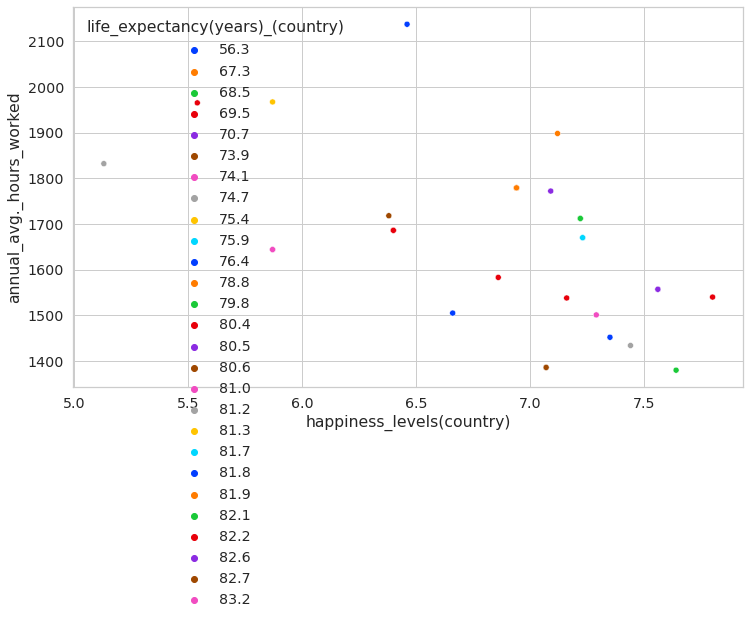

In [97]:
plt.figure(figsize= (12,7))
sns.scatterplot(data=health_data,x = 'happiness_levels(country)',
                y = 'annual_avg._hours_worked',hue= 'life_expectancy(years)_(country)',palette='bright')

# Is there any realtion between pollution level and life expectancy ?

<Figure size 864x864 with 0 Axes>

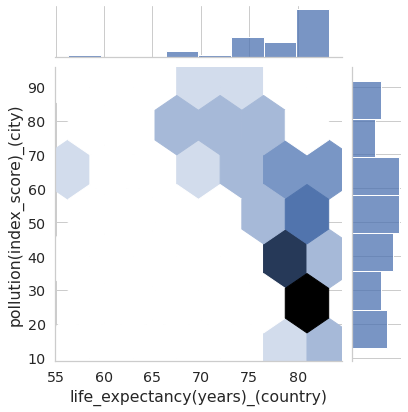

In [98]:
plt.figure(figsize=(12,12))
a=sns.jointplot(data=health_data, x='life_expectancy(years)_(country)',y='pollution(index_score)_(city)',kind='hex')

# How pollution level and happiness is associated

In [99]:
health_data.columns

Index(['city', 'rank', 'sunshine_hours(city)',
       'cost_of_a_bottle_of_water(city)', 'obesity_levels(country)',
       'life_expectancy(years)_(country)', 'pollution(index_score)_(city)',
       'annual_avg._hours_worked', 'happiness_levels(country)',
       'outdoor_activities(city)', 'number_of_take_out_places(city)',
       'cost_of_a_monthly_gym_membership(city)'],
      dtype='object')

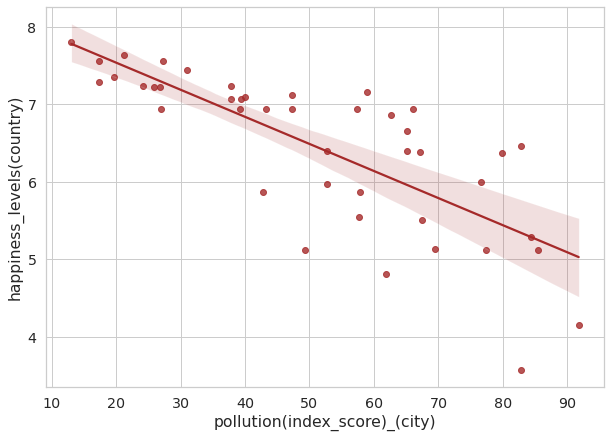

In [100]:
plt.figure(figsize=(10,7))
sns.regplot(x='pollution(index_score)_(city)', y='happiness_levels(country)', data=health_data,color='brown')

Observations
- Lower pollution means higher happiness

# How life expectancy and happiness is related

In [101]:
health_data.columns

Index(['city', 'rank', 'sunshine_hours(city)',
       'cost_of_a_bottle_of_water(city)', 'obesity_levels(country)',
       'life_expectancy(years)_(country)', 'pollution(index_score)_(city)',
       'annual_avg._hours_worked', 'happiness_levels(country)',
       'outdoor_activities(city)', 'number_of_take_out_places(city)',
       'cost_of_a_monthly_gym_membership(city)'],
      dtype='object')

In [102]:
health_data['life_expectancy(years)_(country)'].dtypes

dtype('float64')

In [103]:
health_data['happiness_levels(country)'].dtypes

dtype('float64')

Text(0.5, 1.0, 'Relation between Happiness levels and Life expectancy')

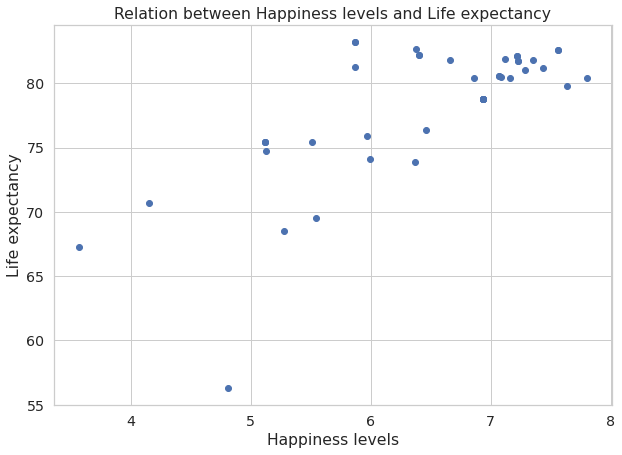

In [104]:
plt.figure(figsize=(10,7))
plt.scatter(health_data['happiness_levels(country)'],health_data['life_expectancy(years)_(country)'],c="b")
plt.xlabel("Happiness levels");
plt.ylabel("Life expectancy");
plt.title("Relation between Happiness levels and Life expectancy")

# Check obescity of country

In [105]:
health_data.columns

Index(['city', 'rank', 'sunshine_hours(city)',
       'cost_of_a_bottle_of_water(city)', 'obesity_levels(country)',
       'life_expectancy(years)_(country)', 'pollution(index_score)_(city)',
       'annual_avg._hours_worked', 'happiness_levels(country)',
       'outdoor_activities(city)', 'number_of_take_out_places(city)',
       'cost_of_a_monthly_gym_membership(city)'],
      dtype='object')

In [106]:
health_data['obesity_levels(country)'].describe()

count   44
mean    22
std     10
min      4
25%     20
50%     22
75%     29
max     36
Name: obesity_levels(country), dtype: float64

## Categorise obesity into three group 'low','moderate','high'

- Low -- between 10-20
- moderate --20-30
- high  ---more than 30

In [107]:
obescity = []

for a in health_data['obesity_levels(country)']:
  if a>=10 and a<20:
    obescity.append('low')
  elif a>=20 and a<30:
    obescity.append('moderate')
  else:
    obescity.append('high')

In [108]:
health_data['obescity_range'] = pd.Series(obescity)

In [109]:
health_data.head()

,city,rank,sunshine_hours(city),cost_of_a_bottle_of_water(city),obesity_levels(country),life_expectancy(years)_(country),pollution(index_score)_(city),annual_avg._hours_worked,happiness_levels(country),outdoor_activities(city),number_of_take_out_places(city),cost_of_a_monthly_gym_membership(city),obescity_range
0,Amsterdam,1,1858,2,20,81,31,1434,7,422,1048,35,moderate
1,Sydney,2,2636,1,29,82,27,1712,7,406,1103,42,moderate
2,Vienna,3,1884,2,20,81,17,1501,7,132,1008,26,moderate
3,Stockholm,4,1821,2,21,82,20,1452,7,129,598,37,moderate
4,Copenhagen,5,1630,2,20,80,21,1380,8,154,523,33,low


# Relation between obescity and city

Text(0.5, 1.0, 'Relation between obesity and number of take out places in a city')

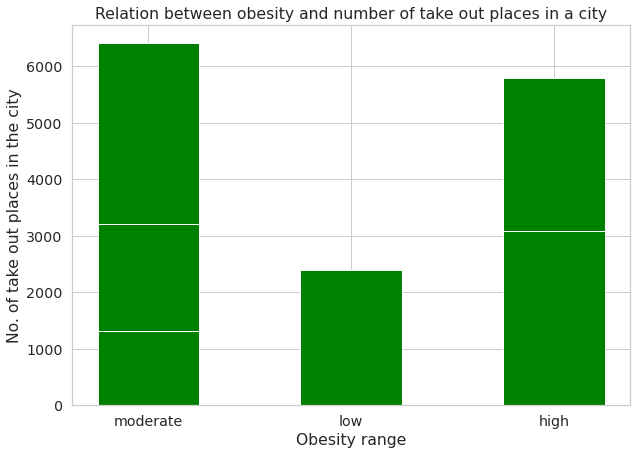

In [110]:
plt.figure(figsize=(10,7))
g= plt.bar(health_data['obescity_range'],health_data["number_of_take_out_places(city)"],color= 'green',width= 0.5)
plt.xlabel("Obesity range")
plt.ylabel("No. of take out places in the city")
plt.title("Relation between obesity and number of take out places in a city")


In [111]:
health_data.columns

Index(['city', 'rank', 'sunshine_hours(city)',
       'cost_of_a_bottle_of_water(city)', 'obesity_levels(country)',
       'life_expectancy(years)_(country)', 'pollution(index_score)_(city)',
       'annual_avg._hours_worked', 'happiness_levels(country)',
       'outdoor_activities(city)', 'number_of_take_out_places(city)',
       'cost_of_a_monthly_gym_membership(city)', 'obescity_range'],
      dtype='object')

# City vs outdoor_activities(city)

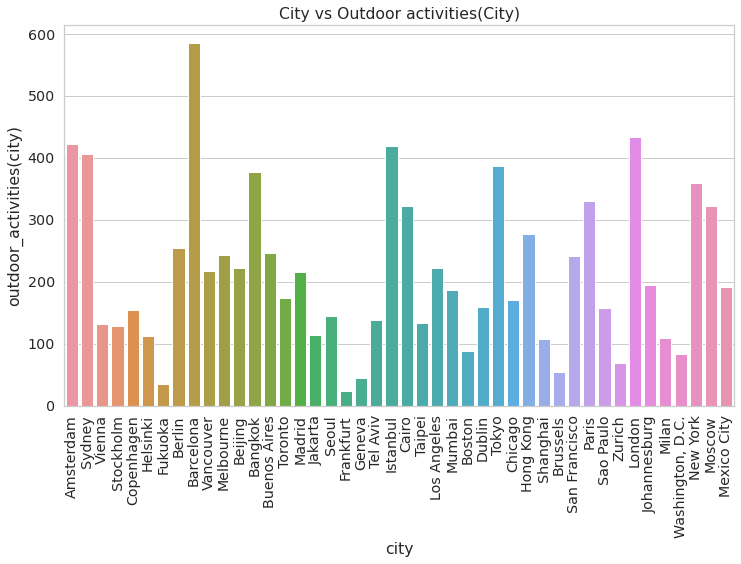

In [117]:
plt.figure(figsize=(12,7))
sns.barplot(data= health_data,x = 'city',y ='outdoor_activities(city)')
plt.xticks(rotation= 90)
plt.title("City vs Outdoor activities(City)")
plt.show()

# City vs number_of_take_out_places(city)

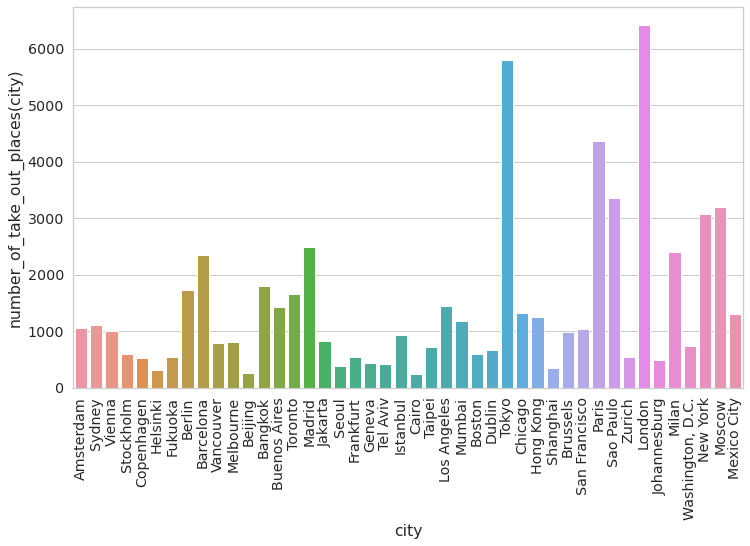

In [120]:
plt.figure(figsize=(12,7))
sns.barplot(data= health_data,x = 'city',y ='number_of_take_out_places(city)')
plt.xticks(rotation = 90)
plt.show()

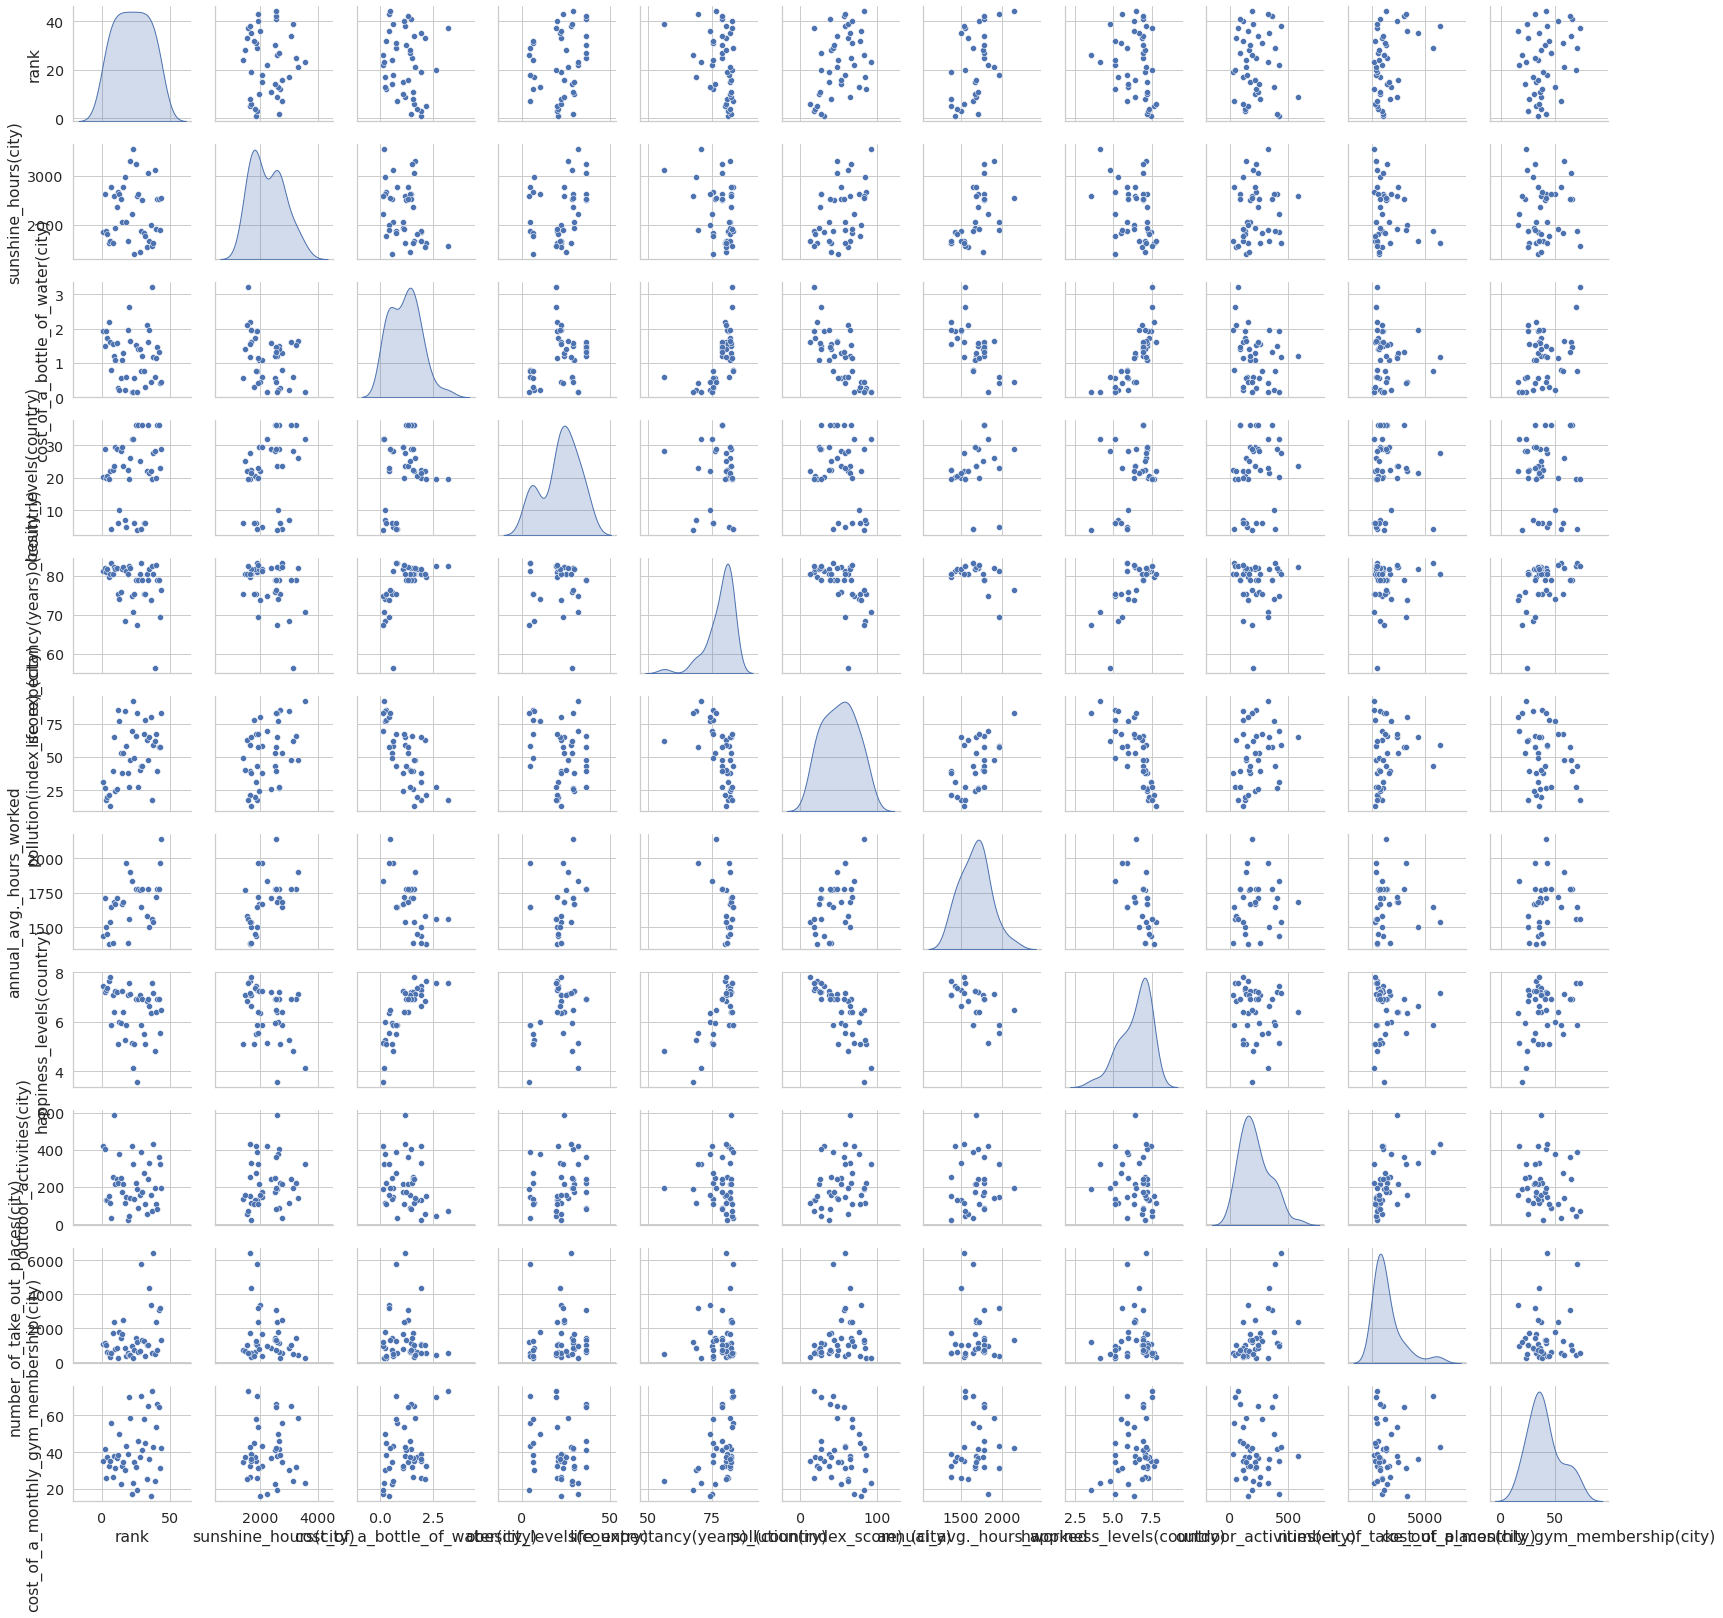

In [122]:
sns.pairplot(health_data,diag_kind='kde')

# Model Building

# Target variable --happiness_levels(country)

In [123]:
health_data.columns

Index(['city', 'rank', 'sunshine_hours(city)',
       'cost_of_a_bottle_of_water(city)', 'obesity_levels(country)',
       'life_expectancy(years)_(country)', 'pollution(index_score)_(city)',
       'annual_avg._hours_worked', 'happiness_levels(country)',
       'outdoor_activities(city)', 'number_of_take_out_places(city)',
       'cost_of_a_monthly_gym_membership(city)', 'obescity_range'],
      dtype='object')

In [125]:
health_data['happiness_levels(country)'].dtypes

dtype('float64')

In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score

In [133]:
X = health_data['happiness_levels(country)'].values.reshape(-1,1)
y = health_data['life_expectancy(years)_(country)'].values.reshape(-1,1)

In [134]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.25)

In [136]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [138]:
y_pred = model.predict(X_test)

In [139]:
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

Training Accuracy : 0.49422953058077446
Testing Accuracy : 0.5776777796776362


In [140]:
lin_reg = LinearRegression().fit(X_train,y_train)

In [141]:
lin_reg.coef_[0][0]

4.278105277157727

In [142]:
lin_reg.intercept_[0]

50.4481754121613

In [143]:
print("{0}+{1}*Happiness Level".format(lin_reg.intercept_[0],lin_reg.coef_[0][0]))

50.4481754121613+4.278105277157727*Happiness Level


In [144]:
y_pred = lin_reg.predict(X_test)
y_pred[0:10]

array([[81.3361],
       [65.721 ],
       [82.7907],
       [75.5607],
       [75.5607],
       [82.7907],
       [73.0366],
       [72.3521],
       [83.8174],
       [82.2773]])

In [145]:
np.sqrt(mean_squared_error(y_test,y_pred))

3.537079204525994

In [146]:
health_data.columns

Index(['city', 'rank', 'sunshine_hours(city)',
       'cost_of_a_bottle_of_water(city)', 'obesity_levels(country)',
       'life_expectancy(years)_(country)', 'pollution(index_score)_(city)',
       'annual_avg._hours_worked', 'happiness_levels(country)',
       'outdoor_activities(city)', 'number_of_take_out_places(city)',
       'cost_of_a_monthly_gym_membership(city)', 'obescity_range'],
      dtype='object')

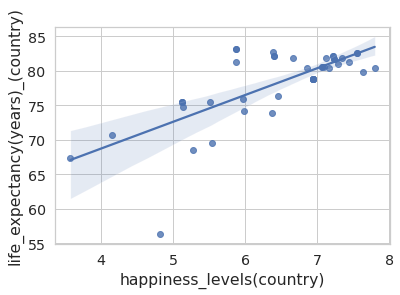

In [147]:
var = sns.regplot(health_data["happiness_levels(country)"],health_data["life_expectancy(years)_(country)"])

# The END